# Statistics Assignment - Springboard

<hr style="border:2px solid black"> </hr>

### 1. Data Exploration: Data Handling and Formatting:

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pld = pd.read_csv("./Product Launch Dataset.csv",encoding='latin-1')
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114689 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   market_subcategory  114689 non-null  object
 1   id                  114689 non-null  int64 
 2   eventdate           114689 non-null  object
 3   country             114689 non-null  object
 4   positioning         110377 non-null  object
 5   region              114689 non-null  object
 6   flavor              112713 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [3]:
pld.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango


In [4]:
# Dropping NA values
pld_flavor = pld[pld['flavor'].notna()].copy()
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114689 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   market_subcategory  114689 non-null  object
 1   id                  114689 non-null  int64 
 2   eventdate           114689 non-null  object
 3   country             114689 non-null  object
 4   positioning         110377 non-null  object
 5   region              114689 non-null  object
 6   flavor              112713 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [5]:
# Dividing Flavor Combinations and Flavor Variants
def divide(s: str):
    s = s.lower()
    
    # Converting long string to short for clean data.
    s = s.replace(', not specified', '-ns')
    
    # `-` represents `type` of flavor.
    s = s.replace(', ', '-')
    
    # `+` represents `combination` of flavors.
    s = s.replace('; ', ' + ')
    
    # Putting variants in array to convert them to separate rows later
    s = s.split('|| ')
    return s

pld_flavor['flavor'] = pd.Series(map(lambda x: divide(x), pld_flavor['flavor']))

In [6]:
pld_flavor.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,[herbs-ns + fruit-ns]
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,[fruit-ns]
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,[lemon + honey + ginger]
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,[mango + passion fruit]
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,[mango]


***
#### Treatment of the '||' symbol for variant division.

As a separate product:

   * Below is the [chart](https://www.statista.com/statistics/283986/soft-drinks-market-share-of-fruit-juice-in-the-united-kingdom-uk-by-flavour/) for soft-drink market share divided by flavors provided by statista. If we consider all variants of flavors as one product, it will cause lack of information when a flavor is performing better than another. 
   * From the chart, it is clear that 'orange' flavor overtook the whole market. Similarly, we might have high demand for one flavor than another. Production of low performing flavors can be reduced if we consider variants as separate products.
   * Also if a product is released in multiple flavors, the total number of products released will be 1 if considered as single product. Dividing into multiple products will give a deeper look into total number of products released in an year or region.
   
   
   <a href="https://www.statista.com/statistics/283986/soft-drinks-market-share-of-fruit-juice-in-the-united-kingdom-uk-by-flavour/" rel="nofollow"><img src="https://www.statista.com/graphic/1/283986/soft-drinks-market-share-of-fruit-juice-in-the-united-kingdom-uk-by-flavour.jpg" alt="Statistic: Market share of fruit juice in the United Kingdom in 2020, by flavor | Statista" style="width: 40%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a>
   
Alternate Case: 

* If we consider them as single product, we will not get variant based data.
* If we ignore them as whole, it will be considered as a unique flavor as a combination than multiple variants.
***

In [7]:
# Stacking the array values and converting them into rows for each element in the array
pld_flavor = pld_flavor.explode('flavor').copy()

In [8]:
pld_flavor.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,herbs-ns + fruit-ns
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,fruit-ns
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,lemon + honey + ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,mango + passion fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,mango


***
#### 1. Create a list of unique flavors based on your analysis. What is the total number of unique flavors in your list?

In [9]:
unique = pld_flavor.flavor.unique()
print('Total Unique Flavors:', len(unique))

Total Unique Flavors: 13678


***
#### 2. Plot histogram of market subcategory against eventdate (years). Do any categories show negative trend over years?

In [10]:
pld_flavor['year'] = pd.DatetimeIndex(pld_flavor['eventdate']).year
pld_flavor['quarter'] = pd.DatetimeIndex(pld_flavor['eventdate']).quarter

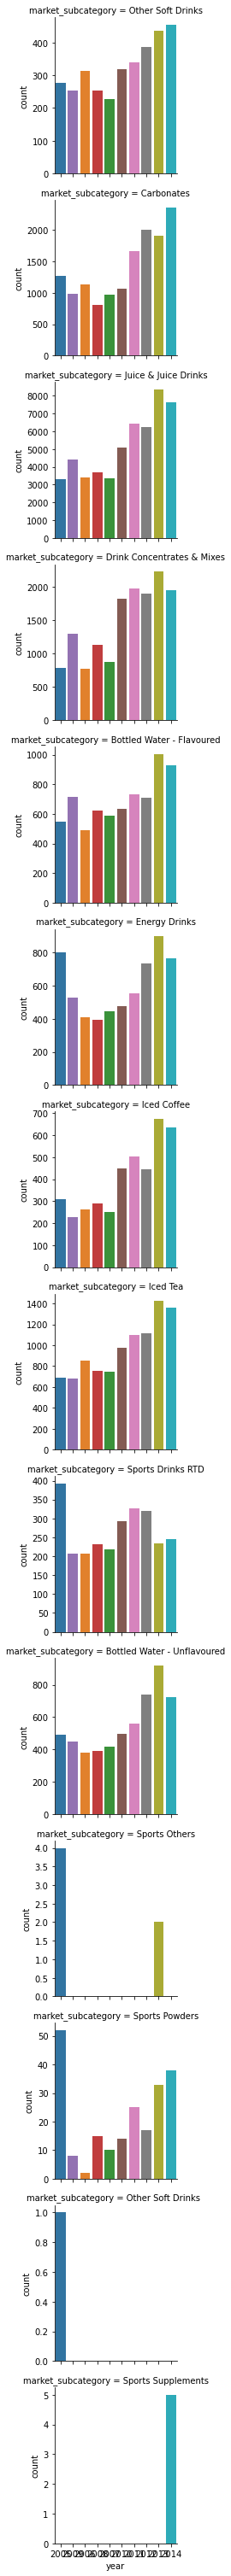

In [11]:
g = sns.FacetGrid(data = pld_flavor, row='market_subcategory', sharey=False, hue='year')
g.map(sns.countplot, 'year', order = pld_flavor.year.unique())

#### Looking for negative trends
* Each bar represents an year from 2005 to 2014
* Sports Others, Other Soft Drinks have seen complete negative trend. 
* Sports Powder, Energy Drinks, Sports Drinks RTD have seen a negative trend when compared to the early years, but after that it has seen a postive trend.

***
#### 3. Which market subcategory has highest unique flavors?

In [12]:
pld_nodup = pld.drop_duplicates(subset=['flavor'])
pld_nodup['market_subcategory'].mode()[0]

'Juice & Juice Drinks'

<hr style="border:2px solid black"> </hr>

### 2. Data Exploration: Merging and Manipulating Datasets:

In [13]:
fcd = pd.read_csv('./Flavor Classification Dataset.csv',encoding='latin-1')
fcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Flavor_Group  1445 non-null   object
 1   flavor        1445 non-null   object
dtypes: object(2)
memory usage: 22.7+ KB


In [14]:
# Standardising the flavor column
fcd['flavor'] = pd.Series(map(lambda x: divide(x), fcd['flavor']))
fcd = fcd.explode('flavor')
fcd.head()

,Flavor_Group,flavor
0,Alcohol,vodka-citron
1,Alcohol,bacardi
2,Alcohol,bacardi-gold
3,Alcohol,bacardi-silver
4,Alcohol,beer-ale


In [15]:
# Merging PLD with FCD over flavor to get Flavor_Group
pld_withFG = pld_flavor.merge(fcd, left_on='flavor', right_on='flavor')
pld_withFG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76460 entries, 0 to 76459
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   market_subcategory  76460 non-null  object
 1   id                  76460 non-null  int64 
 2   eventdate           76460 non-null  object
 3   country             76460 non-null  object
 4   positioning         73558 non-null  object
 5   region              76460 non-null  object
 6   flavor              76460 non-null  object
 7   year                76460 non-null  int64 
 8   quarter             76460 non-null  int64 
 9   Flavor_Group        76460 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.4+ MB


***
#### Number of product launches over different quarters for “fruit” flavor

<AxesSubplot:xlabel='year', ylabel='count'>

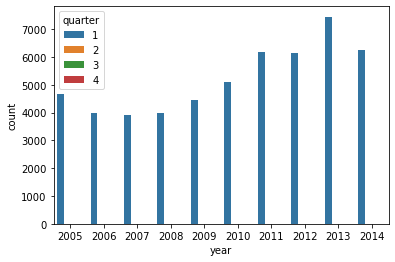

In [16]:
sns.countplot(data=pld_withFG[pld_withFG['Flavor_Group']=='Fruit'], x='year', hue='quarter')

Since there is high difference between Q1 and other quarters, it is better to see tabular data.

In [17]:
pld_withFG[pld_withFG['Flavor_Group']=='Fruit'].groupby(['year', 'quarter']).count()['id']

year  quarter
2005  1          4679
      2             5
      3             2
      4             1
2006  1          3981
2007  1          3897
2008  1          3985
2009  1          4457
2010  1          5091
      2             3
      3             4
2011  1          6188
2012  1          6135
2013  1          7449
      3             1
      4             2
2014  1          6249
Name: id, dtype: int64

Here, we can see Q1 has more product launches in 'Fruit' flavor group, with negligible product launches in 2,3,4 quarters.

**Since, Q2 is the beginning of the summer season, product launches for 'fruit' flavor right before the season is seen.**

<hr style="border:2px solid black"> </hr>

### 3. Data Formatting, Merging and Manipulating Datasets:

In [18]:
pcmd = pd.read_csv('./Positioning Category Mapping Dataset.csv',encoding='latin-1')
pcmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Positioning Group        114 non-null    object
 1   Positioning Subcategory  114 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [19]:
pcmd.head()

,Positioning Group,Positioning Subcategory
0,Age,Children (5-12 years)
1,Age,Seniors (55+)
2,Others,Economy
3,Choice,Halal
4,Choice,Kosher


In [20]:
# Dividing Multiple Positioning values into a list
def divide(s: str):
    s = s.lower()
    
    # Putting variants in array to convert them to separate rows later
    s = s.split(', ')
    return s

pld_pos = pld[pld['positioning'].notna()].copy()
pld_pos['positioning'] = pd.Series(map(lambda x: divide(x), pld_pos['positioning']))

In [21]:
pld_pos = pld_pos.explode('positioning')
pld_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321671 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   market_subcategory  321671 non-null  object
 1   id                  321671 non-null  int64 
 2   eventdate           321671 non-null  object
 3   country             321671 non-null  object
 4   positioning         317455 non-null  object
 5   region              321671 non-null  object
 6   flavor              316814 non-null  object
dtypes: int64(1), object(6)
memory usage: 19.6+ MB


***
#### Standardizing the positioning subcategory column in PCMD and merging with PLD

In [22]:
pcmd['Positioning Subcategory'] = pcmd['Positioning Subcategory'].apply(lambda x: x.lower())

In [23]:
pld_withPSC = pld_pos.merge(pcmd, left_on='positioning', right_on='Positioning Subcategory')

#### Distribution of Convenience Positioning Group along with pie chart

In [24]:
pld_withPSC[pld_withPSC['Positioning Group']=='Convenience'].groupby('positioning').count()['id']

positioning
convenience - consumption        55674
convenience - easy-to-prepare    10851
convenience - packaging           9572
convenience - ready prepared       607
convenience - time saving          793
Name: id, dtype: int64

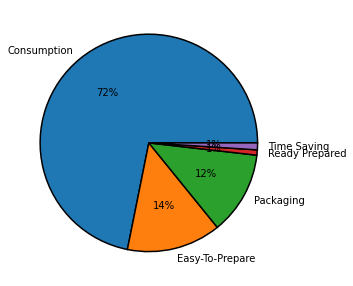

In [25]:
# Plotting Pie chart
fig = plt.figure(figsize =(5, 5))
labels=['Consumption', 'Easy-To-Prepare', 'Packaging', 'Ready Prepared', 'Time Saving']
wp = { 'linewidth' : 1.5, 'edgecolor' : "black" }
temp = plt.pie(data=pld_withPSC[pld_withPSC['Positioning Group']=='Convenience'].groupby('positioning').count(), 
               x='id',
               labels=labels, 
               wedgeprops=wp, 
               autopct='%.0f%%')

Convenience Consumption takes 72% of the total distribution of Convenience Positioning Group.

#### Distribution of Ethical Positioning Group along with pie chart

In [26]:
pld_withPSC[pld_withPSC['Positioning Group'] == 'Ethical'].groupby('positioning').size()

positioning
ethical - animal/fish & bird      104
ethical - environment            1587
ethical - human                  1164
ethical - not specific             26
ethical - packaging             17521
dtype: int64

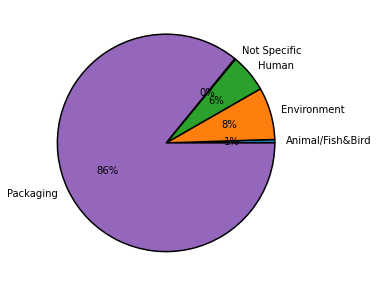

In [27]:
fig = plt.figure(figsize =(5, 5))
labels=['Animal/Fish&Bird', 'Environment', 'Human', 'Not Specific', 'Packaging']
wp = { 'linewidth' : 1.5, 'edgecolor' : "black" }
temp = plt.pie(data=pld_withPSC[pld_withPSC['Positioning Group']=='Ethical'].groupby('positioning').count(), 
               x='id',
               labels=labels, 
               wedgeprops=wp,
               autopct='%.0f%%')

Ethical Packaging takes 86% of the total distribution of Ethical Positioning Group.

<hr style="border:2px solid black"> </hr>

### 4. Data Aggregation
Since Pivot Tables, Charts, and Slicers are required, It is done in <u>Excel</u>.

file: `"./Product Launch Dataset - Summary Stats.xlsx"`

<hr style="border:2px solid black"> </hr>

### 5. Data Exploration: Filtering and Subsetting

####  Data from the Canada market for the year 2013 about Energy-Drinks with Ethical packaging.

In [28]:
pld[(pld['eventdate'].str.endswith('2013')) 
    & (pld['country']=='Canada') & (pld['market_subcategory']=='Energy Drinks') 
    & (pld['positioning'].str.find('Ethical - Packaging') != -1)]

,market_subcategory,id,eventdate,country,positioning,region,flavor
82404,Energy Drinks,82405,01-11-2013,Canada,"Organic, Energy/Alertness, Ethical - Human, Et...",North America,"Berry, Not specified; Tea, Green; Tea, Mate"
82405,Energy Drinks,82406,01-11-2013,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Citrus, Not Specified"
82439,Energy Drinks,82440,01-11-2013,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Cherry, Not Specified"
82440,Energy Drinks,82441,01-11-2013,Canada,"Brain Health, Energy/Alertness, Ethical - Pack...",North America,"Berry, Mixed"


***
#### Top 5 most produced unique flavors across each country in 2013.

In [29]:
pld_flavor[pld_flavor['year']==2013].groupby(['country'])['flavor'].apply(lambda x: x.value_counts()[:5].index.tolist())

country
Albania                 [unflavored, cola, guava, lemon + malt, pineap...
Algeria                 [unflavored, fruit-ns, grape-white + aloe vera...
Angola                               [tea-ns + lemon + superfruit-cactus]
Argentina               [orange-ns, apple-red, unflavored, lemon, grap...
Australia               [unflavored, orange-ns, fruit-ns, apple-red, c...
                                              ...                        
United Arab Emirates    [orange-ns, mango, unflavored, apple-red, frui...
United Kingdom          [unflavored, orange-ns, apple-red, lemon, grap...
United States             [unflavored, orange-ns, apple-red, cola, mango]
Uruguay                                                [mango, grape-red]
Vietnam                 [orange-ns, coffee-ns, cola, superfruit-pomegr...
Name: flavor, Length: 89, dtype: object

***
#### Top 5 most produced unique flavors across all countries in 2013.

In [30]:
pld_flavor[pld_flavor['year']==2013]['flavor'].value_counts()[:5].index.tolist()

['unflavored', 'orange-ns', 'apple-red', 'lemon', 'fruit-ns']

<hr style="border:2px solid black"> </hr>

### 6. Hypothesis Testing: TOP 5 Positioning Groups

#### Top 5 most positioning groups across each country in 2013.

In [31]:
pld_withPSC[pld_withPSC['eventdate'].str.endswith('2013')
           ].drop_duplicates(subset=['id','Positioning Group'
                                    ]).groupby(['country'])['Positioning Group'
                                                           ].apply(lambda x: x.value_counts()[:5].index.tolist())

country
Albania                 [Convenience, Health (Passive), Juice, Ethical...
Algeria                 [Convenience, Health (Passive), Juice, Health ...
Angola                                              [Others, Convenience]
Argentina               [Convenience, Health (Passive), Juice, Ethical...
Australia               [Convenience, Health (Passive), Choice, Ethica...
                                              ...                        
Ukraine                 [Convenience, Juice, Health (Passive), Ethical...
United Arab Emirates    [Convenience, Health (Passive), Juice, Ethical...
United Kingdom          [Convenience, Health (Passive), Juice, Ethical...
United States           [Convenience, Health (Passive), Ethical, Choic...
Vietnam                 [Convenience, Health (Passive), Juice, Ethical...
Name: Positioning Group, Length: 88, dtype: object

#### Top 5 most positioning groups across all countries in 2013.

In [32]:
pld_withPSC[pld_withPSC['eventdate'].str.endswith('2013')
           ].drop_duplicates(subset=['id','Positioning Group'])['Positioning Group'
                                                               ].value_counts()[:5].index.tolist()

['Convenience', 'Health (Passive)', 'Juice', 'Ethical', 'Choice']

***
#### Testing Top 5 Positioning Groups for Dependency between each other.

In [33]:
hyp = pld_withPSC.sort_values('id')[['id', 'Positioning Group']].drop_duplicates(subset=['id', 'Positioning Group'])

In [34]:
hyp['Convenience'] = hyp['Positioning Group'].apply(lambda x: x=='Convenience')
hyp['Health (Passive)'] = hyp['Positioning Group'].apply(lambda x: x=='Health (Passive)')
hyp['Juice'] = hyp['Positioning Group'].apply(lambda x: x=='Juice')
hyp['Ethical'] = hyp['Positioning Group'].apply(lambda x: x=='Ethical')
hyp['Choice'] = hyp['Positioning Group'].apply(lambda x: x=='Choice')
hyp = hyp[['id','Convenience', 'Health (Passive)', 'Juice', 'Ethical', 'Choice']]
hyp = hyp.groupby('id').sum().astype(bool)
hyp.head()

,Convenience,Health (Passive),Juice,Ethical,Choice
id,,,,,
1,False,True,False,False,False
2,True,False,False,False,False
3,True,True,True,False,False
4,True,True,True,False,False
5,True,True,True,False,False


#### As we do not have numerical data, we have to go with <u>chi-square</u> test. As we are interested in independency, we use <u>pearson's chi-square test.</u>

In [35]:
# Significance level - 5%
alpha = 0.05

#### Null Hypothesis - 1
H0: Convenience PG is independent of Health (Passive) PG

In [36]:
(_, _), cont_tab_1 = stats.contingency.crosstab(hyp['Convenience'], hyp['Health (Passive)'])
stat_1, p_1, dof_1, expected_1 = stats.chi2_contingency(cont_tab_1)

if p_1 < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

print('p-value:', round(p_1, 3))

Reject Null Hypothesis
p-value: 0.0


* Since the p_value is less than our significance level 0.05, we reject the null hypothesis.
* At 5% significance, we found a statistical evidence to prove dependency between Convenience and Health (Passive) Positional Groups
* Since p-value has more than 3 `0`'s after decimal, there is no place for type-1 error
---

#### Null Hypothesis - 2
H0: Health (Passive) PG is independent of Juice PG

In [37]:
(_, _), cont_tab_2 = stats.contingency.crosstab(hyp['Health (Passive)'], hyp['Juice'])
stat_2, p_2, dof_2, expected_2 = stats.chi2_contingency(cont_tab_2)

if p_2 < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

print('p-value:', round(p_2, 3))

Reject Null Hypothesis
p-value: 0.0


* Since the p_value is less than our significance level 0.05, we reject the null hypothesis.
* At 5% significance, we found a statistical evidence to prove dependency between Health (Passive) and Juice Positional Groups
* Since p-value has more than 3 `0`'s after decimal, there is no place for type-1 error 
---

#### Null Hypothesis - 3
H0: Juice PG is independent of Ethical PG

In [38]:
(_, _), cont_tab_3 = stats.contingency.crosstab(hyp['Juice'], hyp['Ethical'])
stat_3, p_3, dof_3, expected_3 = stats.chi2_contingency(cont_tab_3)

if p_3 < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

print('p-value:', round(p_3, 3))

Reject Null Hypothesis
p-value: 0.0


* Since the p_value is less than our significance level 0.05, we reject the null hypothesis.
* At 5% significance, we found a statistical evidence to prove dependency between Juice and Ethical Positional Groups
* Since p-value has more than 3 `0`'s after decimal, there is no place for type-1 error 
---

#### Null Hypothesis - 4
H0: Ethical PG is independent of Choice PG

In [39]:
(_, _), cont_tab_4 = stats.contingency.crosstab(hyp['Ethical'], hyp['Choice'])
stat_4, p_4, dof_4, expected_4 = stats.chi2_contingency(cont_tab_4)
if p_4 < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

print('p-value:', round(p_4, 3))

Reject Null Hypothesis
p-value: 0.0



* Since the p_value is less than our significance level 0.05, we reject the null hypothesis.
* At 5% significance, we found a statistical evidence to prove dependency between Ethical and Choice Positional Groups
* Since p-value has more than 3 `0`'s after decimal, there is no place for type-1 error 

#### Rejecting all the null hypotheses, we can state:
* All the positioning groups are dependent on each other.
* All of the tests revealing negligible p-values giving us strong statistical evidence on our decision.
<hr style="border:2px solid black"> </hr>